In [1]:
import numpy as np

# data 폴더 안에 있는 births.txt 파일 read 하기
birth = np.loadtxt('/content/data/births.txt', delimiter=',', dtype=np.int64)

In [3]:
print(birth.shape) # 132행 3열
print(type(birth))

(132, 3)
<class 'numpy.ndarray'>


In [19]:
print(birth[-1])

# 결과 : 연도, 남자 아이 수, 여자 아이 수

[   2011 1753500 1893230]


In [136]:
import matplotlib.pyplot as plt

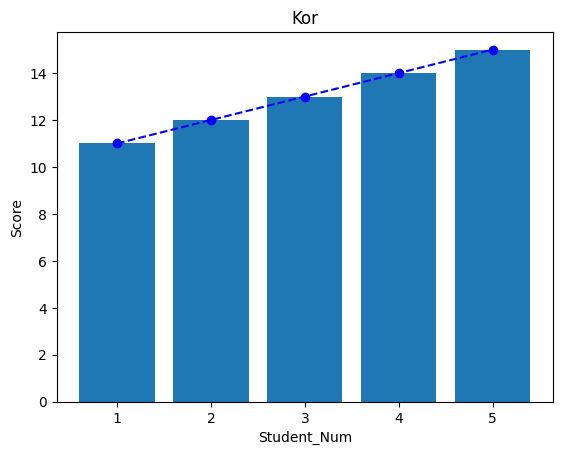

In [137]:
a = np.array([1,2,3,4,5])
b = np.array([11,12,13,14,15])

plt.plot(a,b, 'bo--')
plt.bar(a,b)

plt.title('Kor')
plt.xlabel("Student_Num")
plt.ylabel("Score")
plt.show()

In [148]:
# 남자 아이, 여자 아이 출생 수의 평균 (정수로 출력)
#132개 년도,
print(birth.shape)
total = np.sum(birth, axis=0)
avg_male = int(total[1]/birth.shape[0])
avg_female = int(total[2]/birth.shape[0])

# mean_male = np.mean(birth[:,1])
# print(int(mean_male))
# mean_female = np.mean(birth[:,2])
# print(int(mean_male))
print("남자 아이 출생 수 평균 : %d" %avg_male)
print("여자 아이 출생 수 평균 : %d" %avg_female)


(132, 3)
1225776.0681818181
남자 아이 출생 수 평균 : 1225776
여자 아이 출생 수 평균 : 1245399


In [150]:
# 2000년 부터의 데이터를 구하기
# 연도, 남자, 여자 형태로 다시 구현

#행의 개수가 132개인 배열
data_after2000  = np.empty((0,3), dtype=np.int64)
for i in birth:
  if i[0]>=2000:
    data_after2000 = np.append(data_after2000, np.array([i]), axis=0)
#주의! append는 새로 데이터 주소를 할당해줘야 정상적으로 작동함....
#기존 배열을 수정하는식이 아니라 새로운 배열을 리턴하는 방식으로 작동함
print("연도",'남자','여자', sep="\t")
print(data_after2000)

#####
for y,m,f in birth[birth[:,0]>=2000]:
  print(y,m,f, sep="\t")


연도	남자	여자
[[   2000 1814601 1962406]
 [   2001 1799049 1941251]
 [   2002 1795206 1939815]
 [   2003 1825359 1973434]
 [   2004 1834145 1982794]
 [   2005 1845379 1994841]
 [   2006 1898463 2052377]
 [   2007 1919408 2072139]
 [   2008 1887234 2036289]
 [   2009 1832925 1979303]
 [   2010 1772738 1913851]
 [   2011 1753500 1893230]]
2000	1814601	1962406
2001	1799049	1941251
2002	1795206	1939815
2003	1825359	1973434
2004	1834145	1982794
2005	1845379	1994841
2006	1898463	2052377
2007	1919408	2072139
2008	1887234	2036289
2009	1832925	1979303
2010	1772738	1913851
2011	1753500	1893230


In [93]:
# 남자아이의 출생이 가장 많았던 연도, 그 때 태어난 남자아이의 출생 수
male_max = np.argmax(birth[:,1])
# print(birth[77])
print("남자아이 출생이 가장 많았던 연도 : %d"%birth[male_max][0])
print("해당 년도 남자아이 출생 수 : %d"%birth[male_max][1])

남자아이 출생이 가장 많았던 연도 : 1957
해당 년도 남자아이 출생 수 : 2044160


In [154]:
# 여자 아이 출생이 가장 많은 TOP 5 를 구하기 ( 연도, 여자 아이 수)
female_max = np.argsort(birth[:,2])
print(female_max[-5:])
for i in range(5):
  print(birth[female_max[-i-1]][0], birth[female_max[-i-1]][2])

[78 81 80 79 77]
1957 2155866
1959 2133509
1960 2132717
1961 2122502
1958 2120712


In [156]:
# 여자아이의 출생률(%)을 구하고, 각 연도별로 여자아이 출생수가 차지하는 비율을 데이터로 보여주기
# 연도 남자 여자 출생률
# 출생률은 소수점 둘째 자리까지 표기

female_birth_rate = np.empty((0,2), dtype=np.float64)

for i in birth:
  birth_rate = (i[2]/(i[1]+i[2]) )*100
  birth_rate = round(birth_rate, 2)
  female_birth_rate = np.append(female_birth_rate, np.array([[int(i[0]),birth_rate]]),axis=0)

print(female_birth_rate.shape)
print("연도  남아  여아  여자 아이의 비율")
for i in range(0,birth.shape[0]):
  print(birth[i][0], birth[i][1],birth[i][2], female_birth_rate[i][1])
###########
print("-----------")
##########
for y,b,g, gr in zip(birth[:,0], birth[:,1], birth[:,2], female_birth_rate[:,1]):
  print(y,b,g, gr)

(132, 2)
연도  남아  여아  여자 아이의 비율
1880 90993 110491 54.84
1881 91954 100745 52.28
1882 107850 113688 51.32
1883 112321 104629 48.23
1884 129022 114445 47.01
1885 133055 107800 44.76
1886 144535 110784 43.39
1887 145982 101414 40.99
1888 178627 120853 40.35
1889 178366 110584 38.27
1890 190377 111025 36.84
1891 185482 101196 35.3
1892 212346 122037 36.5
1893 212906 112317 34.54
1894 222922 115772 34.18
1895 233630 117398 33.44
1896 237920 119570 33.45
1897 234202 112758 32.5
1898 258770 122693 32.16
1899 233023 106212 31.31
1900 299828 150499 33.42
1901 239348 106471 30.79
1902 264077 122659 31.72
1903 261973 119234 31.28
1904 275371 128125 31.75
1905 291629 132319 31.21
1906 295303 133159 31.08
1907 318566 146833 31.55
1908 334313 154344 31.59
1909 347228 163999 32.08
1910 396501 194218 32.88
1911 418299 225968 35.07
1912 558103 429945 43.51
1913 624518 512557 45.08
1914 761548 654762 46.23
1915 983874 848603 46.31
1916 1044323 890099 46.01
1917 1081280 925511 46.12
1918 1157647 1013537 4

In [158]:
#2000년도 이후 데이터에 대해 출생량을 구하고, 태어난 남자아이의 수가 180만 이상이면 '많음' , 아니면 '적음' 출력

for i in data_after2000:
  if i[1]>=1800000:
    print(i[0],'많음')
  else:
    print(i[0],'적음')

########
print("---------")
amount = np.where(data_after2000[:,1]>=1800000, '많음', '적음')
for y,b,amt in zip(data_after2000[:,0], data_after2000[:,1], amount):
  print(y,b,amt)

2000 많음
2001 적음
2002 적음
2003 많음
2004 많음
2005 많음
2006 많음
2007 많음
2008 많음
2009 많음
2010 적음
2011 적음
---------
2000 1814601 많음
2001 1799049 적음
2002 1795206 적음
2003 1825359 많음
2004 1834145 많음
2005 1845379 많음
2006 1898463 많음
2007 1919408 많음
2008 1887234 많음
2009 1832925 많음
2010 1772738 적음
2011 1753500 적음


In [162]:
# 1800년대, 1900년대, 2000년대의 각 남자아이, 여자아이 출생 수의 평균을 구하기
y1800 = np.empty((0,3), dtype=np.int64)
y1900 = np.empty((0,3), dtype=np.int64)
y2000 = np.empty((0,3), dtype=np.int64)

for i in birth:
  if i[0]>=1800 and i[0]<1900:
    y1800 = np.append(y1800, np.array([i]),axis=0)
  elif i[0]<2000:
    y1900 = np.append(y1900, np.array([i]),axis=0)
  else:
    y2000 = np.append(y2000, np.array([i]),axis=0)
# print(y1800.shape)

print("1800 년대 남자아이 출생 수의 평균 : %d" %np.mean(y1800[1], axis=0))
print("1800 년대 여자아이 출생 수의 평균 : %d" %np.mean(y1800[2], axis=0))
print("--------")
print("1900 년대 남자아이 출생 수의 평균 : %d" %np.mean(y1900[1], axis=0))
print("1900 년대 여자아이 출생 수의 평균 : %d" %np.mean(y1900[2], axis=0))
print("--------")
print("2000 년대 남자아이 출생 수의 평균 : %d" %np.mean(y2000[1], axis=0))
print("2000 년대 여자아이 출생 수의 평균 : %d" %np.mean(y2000[2], axis=0))

1800 년대 남자아이 출생 수의 평균 : 64860
1800 년대 여자아이 출생 수의 평균 : 74473
--------
1900 년대 남자아이 출생 수의 평균 : 115906
1900 년대 여자아이 출생 수의 평균 : 129546
--------
2000 년대 남자아이 출생 수의 평균 : 1247433
2000 년대 여자아이 출생 수의 평균 : 1245674


In [130]:
# 여자아이 출생 수의 25% ~ 75% 사이에 있는 값을 구하기 ( 연도, 여자 아이 출생 수)

target =np.quantile(birth[:,2], [0.25, 0.75]).round()
print(target)

target_array = np.empty((0,3), dtype=np.int64)
for i in birth:
  if i[2]>=target[0] and i[2]<=target[1]:
    target_array = np.append(target_array, np.array([i]), axis=0)

for x in target_array:
  print("%d"%x[0] + " %d"%x[2])


[ 491904. 1904686.]
1913 512557
1914 654762
1915 848603
1916 890099
1917 925511
1918 1013537
1919 980149
1920 1064463
1921 1101457
1922 1088287
1923 1096168
1924 1132751
1925 1115958
1926 1110505
1927 1126717
1928 1107518
1929 1075313
1930 1097176
1931 1039127
1932 1043808
1933 991127
1934 1032291
1935 1040930
1936 1036974
1937 1066309
1938 1108841
1939 1106544
1940 1158900
1941 1227941
1942 1380774
1943 1426846
1944 1362555
1945 1345610
1946 1623650
1947 1829223
1948 1754469
1949 1773725
1950 1790673
1951 1881080
1965 1861378
1966 1783964
1967 1744527
1968 1738928
1969 1789732
1970 1859594
1971 1769201
1972 1622666
1973 1559338
1974 1573105
1975 1562207
1976 1569904
1977 1643684
1978 1642250
1979 1721947
1980 1783876
1981 1790907
1982 1813970
1983 1791732
1984 1803830
1985 1847032
1986 1840164
1987 1865662
1995 1902832
1996 1893378
1997 1884122
2011 1893230


2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
[[   2000 1814601]
 [   2001 1799049]
 [   2002 1795206]
 [   2003 1825359]
 [   2004 1834145]
 [   2005 1845379]
 [   2006 1898463]
 [   2007 1919408]
 [   2008 1887234]
 [   2009 1832925]
 [   2010 1772738]
 [   2011 1753500]]


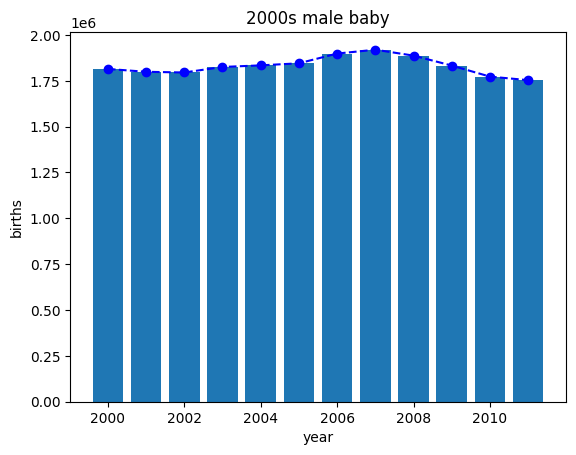

In [173]:
# 2000년대 태어난 남자아이에 대한 데이터를 bar 그래프 형태로 표현하기

y2000_male = np.empty((0,2), dtype=np.int64)
for i in birth:
  if i[0]>=2000:
    print(i[0])
    y2000_male = np.append(y2000_male, np.array([ [i[0],i[1]] ]), axis=0)

print(y2000_male)

x = y2000_male[:,0]
y = y2000_male[:,1]

plt.plot(x,y, 'bo--')
plt.bar(x,y)
plt.title("2000s male baby")
plt.xlabel("year")
plt.ylabel("births")
plt.show()
